### Import dependencies

In [2]:
import autoplier
from autoplier import model, plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


### Load gene expression data

In [3]:
df_log1tpm = pd.read_csv('../data/Overmyer21/GSE157103_genes.log1tpm.tsv.gz', sep='\t', index_col=0)
df_log1tpm

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.398776,0.00000,0.190620,0.039221,0.067659,0.0,0.029559,2.991724,1.623341,0.0,...,1.345472,1.652497,0.667829,0.966984,2.803966,0.058269,2.215937,5.897181,3.004196,1.953028
C2,0.254642,0.00000,0.131028,0.000000,0.000000,0.0,0.048790,2.979603,1.386294,0.0,...,1.515127,2.576422,0.470004,0.765468,2.810607,0.131028,2.219203,5.993463,2.816606,1.633154
C3,0.231112,0.00000,0.029559,0.019803,0.000000,0.0,0.067659,2.698000,1.040277,0.0,...,0.850151,1.332366,0.165514,0.277632,2.926918,0.246860,1.530395,6.066920,2.704711,1.033184
C4,0.371564,0.00995,0.086178,0.067659,0.000000,0.0,0.000000,3.140265,1.652497,0.0,...,1.549688,1.927164,0.875469,1.166271,2.810005,0.239017,2.183802,5.348297,2.758743,2.098018
C5,0.157004,0.00000,0.000000,0.048790,0.067659,0.0,0.000000,2.246015,0.774727,0.0,...,0.891998,1.697449,0.246860,0.438255,2.336020,0.067659,1.940179,5.612800,2.271094,1.308333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,0.262364,0.00000,0.019803,0.019803,0.000000,0.0,0.000000,2.893700,1.085189,0.0,...,0.231112,0.698135,0.122218,0.378436,1.935860,0.215111,0.947789,6.105106,1.396245,0.693147
NC23,0.530628,0.00000,0.019803,0.009950,0.000000,0.0,0.000000,3.059176,0.932164,0.0,...,0.494696,0.604316,0.165514,0.548121,2.277267,0.113329,0.943906,6.619473,1.713798,0.940007
NC24,0.559616,0.00000,0.239017,0.000000,0.058269,0.0,0.000000,3.341093,1.486140,0.0,...,0.779325,1.144223,0.343590,0.828552,2.768204,0.131028,1.800058,6.083633,2.428336,1.607436
NC25,1.335001,0.00000,0.039221,0.000000,0.000000,0.0,0.000000,3.119718,0.887891,0.0,...,0.350657,0.476234,0.173953,0.371564,1.752672,0.285179,0.727549,5.915285,1.040277,0.672944


### Load metadata

In [4]:
df_meta = pd.read_csv('../data/Overmyer21/GSE157103_metadata.tsv', sep='\t', index_col=0)
df_meta

,Sample_label,COVID,Age_less_than_90,Gender,ICU_1,APACHEII,Charlson_score,Mech_Ventilation,Vent_free_days,DM,Hospital_free_days_45,Ferritin_NG/ML,CRP_MG/L,DDIMER_mg/L_FEU,Procalcitonin_NG/ML,Lactate_MMol/L,Fibrinogen,SOFA
C1,COVID_01,1.0,39.0,M,0.0,15.0,0.0,1.0,0.0,0.0,0,946.0,73.1,1.30,36.00,0.9,513.0,8.0
C2,COVID_02,1.0,63.0,M,0.0,NaN,2.0,0.0,28.0,0.0,39,1060.0,NaN,1.03,0.37,NaN,NaN,NaN
C3,COVID_03,1.0,33.0,M,0.0,NaN,2.0,0.0,28.0,1.0,18,1335.0,53.2,1.48,0.07,NaN,513.0,NaN
C4,COVID_04,1.0,49.0,M,0.0,NaN,1.0,0.0,28.0,0.0,39,583.0,251.1,1.32,0.98,0.87,949.0,NaN
C5,COVID_05,1.0,49.0,M,0.0,19.0,1.0,1.0,23.0,0.0,27,800.0,355.8,0.69,4.92,1.48,929.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,NONCOVID_22,0.0,63.0,M,0.0,4.0,2.0,0.0,28.0,0.0,43,NaN,26.1,NaN,0.05,NaN,NaN,1.0
NC23,NONCOVID_23,0.0,42.0,F,0.0,NaN,2.0,0.0,28.0,0.0,40,85.0,41.0,1.87,0.73,1.99,635.0,NaN
NC24,NONCOVID_24,0.0,32.0,F,0.0,NaN,0.0,0.0,28.0,0.0,43,NaN,NaN,0.19,NaN,0.87,NaN,NaN
NC25,NONCOVID_25,0.0,62.0,M,0.0,NaN,8.0,0.0,28.0,0.0,44,NaN,NaN,NaN,NaN,0.99,NaN,NaN


### Load pathways data

In [6]:
# Note, need to point to the Pathway file in the autoPLIER repository
df_pathways = pd.read_csv('../../autoplier/tests/test_data/test_pathways.csv', index_col=0)
df_pathways

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZSCAN25,ZSCAN32,ZSCAN4,ZSWIM8,ZW10,ZWILCH,ZWINT,ZYG11B,ZYX,ZZZ3
BIOCARTA_GRANULOCYTES_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIOCARTA_LYM_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIOCARTA_BLYMPHOCYTE_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIOCARTA_CARM_ER_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIOCARTA_LAIR_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_O_GLYCAN_BIOSYNTHESIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_GLYCOSAMINOGLYCAN_DEGRADATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_GLYCEROLIPID_METABOLISM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train autoPLIER

In [16]:
mod = model.autoPLIER()
mod.fit(df_log1tpm, df_pathways)

2022-01-09 10:54:14.648953: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2000
3/3 - 1s - loss: 70.2111 - magz: 14595.1904 - val_loss: 6.4236 - val_magz: 1074.2712 - 653ms/epoch - 218ms/step
Epoch 2/2000
3/3 - 0s - loss: 35.9106 - magz: 12330.6250 - val_loss: 2.1296 - val_magz: 551.3969 - 30ms/epoch - 10ms/step
Epoch 3/2000
3/3 - 0s - loss: 7.0211 - magz: 5949.9458 - val_loss: 1.1940 - val_magz: 289.1784 - 30ms/epoch - 10ms/step
Epoch 4/2000
3/3 - 0s - loss: 1.7991 - magz: 3235.3076 - val_loss: 1.0228 - val_magz: 160.6496 - 30ms/epoch - 10ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.7070 - magz: 1670.3480 - val_loss: 1.0072 - val_magz: 96.7659 - 29ms/epoch - 10ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.6550 - magz: 1032.2631 - val_loss: 1.0165 - val_magz: 63.4500 - 29ms/epoch - 10ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.7463 - magz: 646.9453 - val_loss: 1.0256 - val_magz: 45.1557 - 29ms/epoch - 10ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.8216 - magz: 463.6463 - val_loss: 1.0321 - val_magz: 34.6249 - 32ms/epoch - 11ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.8719 - 

Epoch 70/2000
3/3 - 0s - loss: 0.5625 - magz: 1375.3077 - val_loss: 0.9989 - val_magz: 109.1508 - 27ms/epoch - 9ms/step
Epoch 71/2000
3/3 - 0s - loss: 0.5615 - magz: 1378.4082 - val_loss: 0.9984 - val_magz: 109.8866 - 26ms/epoch - 9ms/step
Epoch 72/2000
3/3 - 0s - loss: 0.5605 - magz: 1381.7743 - val_loss: 0.9980 - val_magz: 110.7503 - 28ms/epoch - 9ms/step
Epoch 73/2000
3/3 - 0s - loss: 0.5594 - magz: 1387.6461 - val_loss: 0.9977 - val_magz: 111.7070 - 27ms/epoch - 9ms/step
Epoch 74/2000
3/3 - 0s - loss: 0.5586 - magz: 1391.3822 - val_loss: 0.9973 - val_magz: 112.5184 - 26ms/epoch - 9ms/step
Epoch 75/2000
3/3 - 0s - loss: 0.5576 - magz: 1395.7699 - val_loss: 0.9969 - val_magz: 113.3553 - 25ms/epoch - 8ms/step
Epoch 76/2000
3/3 - 0s - loss: 0.5567 - magz: 1399.9498 - val_loss: 0.9965 - val_magz: 114.2256 - 26ms/epoch - 9ms/step
Epoch 77/2000
3/3 - 0s - loss: 0.5558 - magz: 1402.9780 - val_loss: 0.9961 - val_magz: 114.8801 - 27ms/epoch - 9ms/step
Epoch 78/2000
3/3 - 0s - loss: 0.5550 - 

Epoch 138/2000
3/3 - 0s - loss: 0.5242 - magz: 1514.0970 - val_loss: 0.9785 - val_magz: 151.2112 - 31ms/epoch - 10ms/step
Epoch 139/2000
3/3 - 0s - loss: 0.5238 - magz: 1514.9600 - val_loss: 0.9782 - val_magz: 151.8656 - 32ms/epoch - 11ms/step
Epoch 140/2000
3/3 - 0s - loss: 0.5234 - magz: 1516.5582 - val_loss: 0.9779 - val_magz: 152.6216 - 32ms/epoch - 11ms/step
Epoch 141/2000
3/3 - 0s - loss: 0.5229 - magz: 1518.7061 - val_loss: 0.9777 - val_magz: 153.2700 - 31ms/epoch - 10ms/step
Epoch 142/2000
3/3 - 0s - loss: 0.5225 - magz: 1520.4105 - val_loss: 0.9774 - val_magz: 154.1187 - 31ms/epoch - 10ms/step
Epoch 143/2000
3/3 - 0s - loss: 0.5220 - magz: 1523.3667 - val_loss: 0.9771 - val_magz: 154.8472 - 31ms/epoch - 10ms/step
Epoch 144/2000
3/3 - 0s - loss: 0.5216 - magz: 1524.8177 - val_loss: 0.9767 - val_magz: 155.5725 - 31ms/epoch - 10ms/step
Epoch 145/2000
3/3 - 0s - loss: 0.5212 - magz: 1525.7225 - val_loss: 0.9765 - val_magz: 156.2257 - 31ms/epoch - 10ms/step
Epoch 146/2000
3/3 - 0s 

Epoch 206/2000
3/3 - 0s - loss: 0.4967 - magz: 1611.1527 - val_loss: 0.9602 - val_magz: 209.0725 - 34ms/epoch - 11ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.4964 - magz: 1610.0577 - val_loss: 0.9600 - val_magz: 209.6751 - 31ms/epoch - 10ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.4960 - magz: 1609.9766 - val_loss: 0.9598 - val_magz: 210.5259 - 29ms/epoch - 10ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.4957 - magz: 1612.3871 - val_loss: 0.9595 - val_magz: 211.4575 - 28ms/epoch - 9ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.4953 - magz: 1615.2021 - val_loss: 0.9593 - val_magz: 212.2725 - 28ms/epoch - 9ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.4950 - magz: 1617.0450 - val_loss: 0.9591 - val_magz: 213.1570 - 27ms/epoch - 9ms/step
Epoch 212/2000
3/3 - 0s - loss: 0.4947 - magz: 1619.3864 - val_loss: 0.9588 - val_magz: 214.0251 - 31ms/epoch - 10ms/step
Epoch 213/2000
3/3 - 0s - loss: 0.4943 - magz: 1621.2877 - val_loss: 0.9586 - val_magz: 214.8370 - 31ms/epoch - 10ms/step
Epoch 214/2000
3/3 - 0s - l

Epoch 274/2000
3/3 - 0s - loss: 0.4760 - magz: 1687.9951 - val_loss: 0.9433 - val_magz: 272.2934 - 27ms/epoch - 9ms/step
Epoch 275/2000
3/3 - 0s - loss: 0.4757 - magz: 1689.9799 - val_loss: 0.9430 - val_magz: 273.5216 - 26ms/epoch - 9ms/step
Epoch 276/2000
3/3 - 0s - loss: 0.4754 - magz: 1691.8481 - val_loss: 0.9427 - val_magz: 274.7564 - 30ms/epoch - 10ms/step
Epoch 277/2000
3/3 - 0s - loss: 0.4751 - magz: 1695.6569 - val_loss: 0.9424 - val_magz: 276.0912 - 29ms/epoch - 10ms/step
Epoch 278/2000
3/3 - 0s - loss: 0.4748 - magz: 1697.5532 - val_loss: 0.9422 - val_magz: 277.1760 - 30ms/epoch - 10ms/step
Epoch 279/2000
3/3 - 0s - loss: 0.4745 - magz: 1698.8688 - val_loss: 0.9419 - val_magz: 278.3186 - 31ms/epoch - 10ms/step
Epoch 280/2000
3/3 - 0s - loss: 0.4742 - magz: 1700.0957 - val_loss: 0.9417 - val_magz: 279.2639 - 31ms/epoch - 10ms/step
Epoch 281/2000
3/3 - 0s - loss: 0.4739 - magz: 1700.0591 - val_loss: 0.9414 - val_magz: 280.4328 - 29ms/epoch - 10ms/step
Epoch 282/2000
3/3 - 0s - 

Epoch 342/2000
3/3 - 0s - loss: 0.4604 - magz: 1765.0508 - val_loss: 0.9290 - val_magz: 339.0527 - 29ms/epoch - 10ms/step
Epoch 343/2000
3/3 - 0s - loss: 0.4602 - magz: 1765.6886 - val_loss: 0.9289 - val_magz: 339.4573 - 26ms/epoch - 9ms/step
Epoch 344/2000
3/3 - 0s - loss: 0.4601 - magz: 1765.0010 - val_loss: 0.9287 - val_magz: 339.8640 - 27ms/epoch - 9ms/step
Epoch 345/2000
3/3 - 0s - loss: 0.4599 - magz: 1763.8834 - val_loss: 0.9286 - val_magz: 340.2736 - 27ms/epoch - 9ms/step
Epoch 346/2000
3/3 - 0s - loss: 0.4598 - magz: 1764.7164 - val_loss: 0.9284 - val_magz: 340.9827 - 28ms/epoch - 9ms/step
Epoch 347/2000
3/3 - 0s - loss: 0.4596 - magz: 1766.0162 - val_loss: 0.9283 - val_magz: 341.5075 - 31ms/epoch - 10ms/step
Epoch 348/2000
3/3 - 0s - loss: 0.4595 - magz: 1766.2711 - val_loss: 0.9282 - val_magz: 342.0081 - 29ms/epoch - 10ms/step
Epoch 349/2000
3/3 - 0s - loss: 0.4593 - magz: 1767.1385 - val_loss: 0.9281 - val_magz: 342.6016 - 31ms/epoch - 10ms/step
Epoch 350/2000
3/3 - 0s - lo

Epoch 410/2000
3/3 - 0s - loss: 0.4522 - magz: 1783.9442 - val_loss: 0.9209 - val_magz: 365.4421 - 27ms/epoch - 9ms/step
Epoch 411/2000
3/3 - 0s - loss: 0.4521 - magz: 1783.8130 - val_loss: 0.9208 - val_magz: 365.8375 - 27ms/epoch - 9ms/step
Epoch 412/2000
3/3 - 0s - loss: 0.4520 - magz: 1784.5958 - val_loss: 0.9208 - val_magz: 366.1301 - 26ms/epoch - 9ms/step
Epoch 413/2000
3/3 - 0s - loss: 0.4520 - magz: 1785.1229 - val_loss: 0.9207 - val_magz: 366.3328 - 26ms/epoch - 9ms/step
Epoch 414/2000
3/3 - 0s - loss: 0.4518 - magz: 1784.8290 - val_loss: 0.9207 - val_magz: 366.6406 - 24ms/epoch - 8ms/step
Epoch 415/2000
3/3 - 0s - loss: 0.4518 - magz: 1784.5946 - val_loss: 0.9206 - val_magz: 366.8496 - 26ms/epoch - 9ms/step
Epoch 416/2000
3/3 - 0s - loss: 0.4517 - magz: 1784.1890 - val_loss: 0.9205 - val_magz: 367.0444 - 26ms/epoch - 9ms/step
Epoch 417/2000
3/3 - 0s - loss: 0.4516 - magz: 1784.3217 - val_loss: 0.9204 - val_magz: 367.2508 - 24ms/epoch - 8ms/step
Epoch 418/2000
3/3 - 0s - loss: 

Epoch 478/2000
3/3 - 0s - loss: 0.4467 - magz: 1782.3170 - val_loss: 0.9159 - val_magz: 382.6719 - 25ms/epoch - 8ms/step
Epoch 479/2000
3/3 - 0s - loss: 0.4466 - magz: 1781.5319 - val_loss: 0.9158 - val_magz: 382.9426 - 27ms/epoch - 9ms/step
Epoch 480/2000
3/3 - 0s - loss: 0.4465 - magz: 1782.0941 - val_loss: 0.9157 - val_magz: 383.2585 - 28ms/epoch - 9ms/step
Epoch 481/2000
3/3 - 0s - loss: 0.4464 - magz: 1782.7598 - val_loss: 0.9156 - val_magz: 383.4445 - 31ms/epoch - 10ms/step
Epoch 482/2000
3/3 - 0s - loss: 0.4464 - magz: 1782.2573 - val_loss: 0.9155 - val_magz: 383.6633 - 35ms/epoch - 12ms/step
Epoch 483/2000
3/3 - 0s - loss: 0.4463 - magz: 1781.9777 - val_loss: 0.9155 - val_magz: 383.8246 - 31ms/epoch - 10ms/step
Epoch 484/2000
3/3 - 0s - loss: 0.4462 - magz: 1781.1171 - val_loss: 0.9154 - val_magz: 384.0020 - 31ms/epoch - 10ms/step
Epoch 485/2000
3/3 - 0s - loss: 0.4462 - magz: 1781.1932 - val_loss: 0.9153 - val_magz: 384.3645 - 31ms/epoch - 10ms/step
Epoch 486/2000
3/3 - 0s - l

Epoch 546/2000
3/3 - 0s - loss: 0.4425 - magz: 1779.1071 - val_loss: 0.9110 - val_magz: 397.3558 - 26ms/epoch - 9ms/step
Epoch 547/2000
3/3 - 0s - loss: 0.4424 - magz: 1779.4738 - val_loss: 0.9110 - val_magz: 397.5006 - 27ms/epoch - 9ms/step
Epoch 548/2000
3/3 - 0s - loss: 0.4424 - magz: 1779.3590 - val_loss: 0.9109 - val_magz: 397.7001 - 27ms/epoch - 9ms/step
Epoch 549/2000
3/3 - 0s - loss: 0.4423 - magz: 1779.4110 - val_loss: 0.9108 - val_magz: 397.8459 - 26ms/epoch - 9ms/step
Epoch 550/2000
3/3 - 0s - loss: 0.4423 - magz: 1779.4073 - val_loss: 0.9108 - val_magz: 398.0547 - 27ms/epoch - 9ms/step
Epoch 551/2000
3/3 - 0s - loss: 0.4422 - magz: 1778.9834 - val_loss: 0.9107 - val_magz: 398.0623 - 28ms/epoch - 9ms/step
Epoch 552/2000
3/3 - 0s - loss: 0.4422 - magz: 1777.8722 - val_loss: 0.9106 - val_magz: 398.2763 - 27ms/epoch - 9ms/step
Epoch 553/2000
3/3 - 0s - loss: 0.4421 - magz: 1778.3285 - val_loss: 0.9106 - val_magz: 398.4765 - 26ms/epoch - 9ms/step
Epoch 554/2000
3/3 - 0s - loss: 

Epoch 614/2000
3/3 - 0s - loss: 0.4389 - magz: 1772.6689 - val_loss: 0.9067 - val_magz: 408.8877 - 27ms/epoch - 9ms/step
Epoch 615/2000
3/3 - 0s - loss: 0.4389 - magz: 1771.5746 - val_loss: 0.9067 - val_magz: 408.8687 - 26ms/epoch - 9ms/step
Epoch 616/2000
3/3 - 0s - loss: 0.4389 - magz: 1770.8397 - val_loss: 0.9066 - val_magz: 409.0330 - 26ms/epoch - 9ms/step
Epoch 617/2000
3/3 - 0s - loss: 0.4388 - magz: 1771.5043 - val_loss: 0.9066 - val_magz: 409.2426 - 28ms/epoch - 9ms/step
Epoch 618/2000
3/3 - 0s - loss: 0.4388 - magz: 1772.2819 - val_loss: 0.9065 - val_magz: 409.4677 - 28ms/epoch - 9ms/step
Epoch 619/2000
3/3 - 0s - loss: 0.4387 - magz: 1772.6449 - val_loss: 0.9065 - val_magz: 409.6667 - 27ms/epoch - 9ms/step
Epoch 620/2000
3/3 - 0s - loss: 0.4387 - magz: 1772.1049 - val_loss: 0.9064 - val_magz: 409.7768 - 26ms/epoch - 9ms/step
Epoch 621/2000
3/3 - 0s - loss: 0.4386 - magz: 1771.9447 - val_loss: 0.9063 - val_magz: 410.1205 - 25ms/epoch - 8ms/step
Epoch 622/2000
3/3 - 0s - loss: 

Epoch 682/2000
3/3 - 0s - loss: 0.4359 - magz: 1773.1031 - val_loss: 0.9028 - val_magz: 419.3130 - 26ms/epoch - 9ms/step
Epoch 683/2000
3/3 - 0s - loss: 0.4358 - magz: 1772.8784 - val_loss: 0.9028 - val_magz: 419.4157 - 26ms/epoch - 9ms/step
Epoch 684/2000
3/3 - 0s - loss: 0.4358 - magz: 1772.0743 - val_loss: 0.9027 - val_magz: 419.4099 - 26ms/epoch - 9ms/step
Epoch 685/2000
3/3 - 0s - loss: 0.4358 - magz: 1771.8446 - val_loss: 0.9027 - val_magz: 419.6440 - 27ms/epoch - 9ms/step
Epoch 686/2000
3/3 - 0s - loss: 0.4357 - magz: 1772.7549 - val_loss: 0.9026 - val_magz: 419.8554 - 28ms/epoch - 9ms/step
Epoch 687/2000
3/3 - 0s - loss: 0.4357 - magz: 1772.5751 - val_loss: 0.9026 - val_magz: 419.9153 - 27ms/epoch - 9ms/step
Epoch 688/2000
3/3 - 0s - loss: 0.4356 - magz: 1771.4401 - val_loss: 0.9025 - val_magz: 419.8867 - 26ms/epoch - 9ms/step
Epoch 689/2000
3/3 - 0s - loss: 0.4356 - magz: 1770.6793 - val_loss: 0.9024 - val_magz: 419.9778 - 27ms/epoch - 9ms/step
Epoch 690/2000
3/3 - 0s - loss: 

Epoch 750/2000
3/3 - 0s - loss: 0.4333 - magz: 1776.8566 - val_loss: 0.8990 - val_magz: 431.5060 - 30ms/epoch - 10ms/step
Epoch 751/2000
3/3 - 0s - loss: 0.4333 - magz: 1776.2057 - val_loss: 0.8989 - val_magz: 431.7607 - 27ms/epoch - 9ms/step
Epoch 752/2000
3/3 - 0s - loss: 0.4332 - magz: 1776.9086 - val_loss: 0.8989 - val_magz: 432.1201 - 27ms/epoch - 9ms/step
Epoch 753/2000
3/3 - 0s - loss: 0.4332 - magz: 1777.9115 - val_loss: 0.8988 - val_magz: 432.5214 - 28ms/epoch - 9ms/step
Epoch 754/2000
3/3 - 0s - loss: 0.4332 - magz: 1779.0260 - val_loss: 0.8988 - val_magz: 432.7661 - 31ms/epoch - 10ms/step
Epoch 755/2000
3/3 - 0s - loss: 0.4331 - magz: 1778.6898 - val_loss: 0.8987 - val_magz: 432.7841 - 31ms/epoch - 10ms/step
Epoch 756/2000
3/3 - 0s - loss: 0.4331 - magz: 1777.8016 - val_loss: 0.8987 - val_magz: 432.9127 - 32ms/epoch - 11ms/step
Epoch 757/2000
3/3 - 0s - loss: 0.4331 - magz: 1776.2538 - val_loss: 0.8987 - val_magz: 432.9767 - 32ms/epoch - 11ms/step
Epoch 758/2000
3/3 - 0s - l

Epoch 818/2000
3/3 - 0s - loss: 0.4313 - magz: 1778.1927 - val_loss: 0.8965 - val_magz: 442.6406 - 29ms/epoch - 10ms/step
Epoch 819/2000
3/3 - 0s - loss: 0.4313 - magz: 1777.3317 - val_loss: 0.8965 - val_magz: 442.6558 - 26ms/epoch - 9ms/step
Epoch 820/2000
3/3 - 0s - loss: 0.4313 - magz: 1777.0963 - val_loss: 0.8964 - val_magz: 442.8968 - 29ms/epoch - 10ms/step
Epoch 821/2000
3/3 - 0s - loss: 0.4313 - magz: 1777.3652 - val_loss: 0.8964 - val_magz: 443.0330 - 26ms/epoch - 9ms/step
Epoch 822/2000
3/3 - 0s - loss: 0.4312 - magz: 1777.3726 - val_loss: 0.8964 - val_magz: 443.1669 - 27ms/epoch - 9ms/step
Epoch 823/2000
3/3 - 0s - loss: 0.4312 - magz: 1777.1089 - val_loss: 0.8964 - val_magz: 443.2252 - 27ms/epoch - 9ms/step
Epoch 824/2000
3/3 - 0s - loss: 0.4312 - magz: 1776.9125 - val_loss: 0.8964 - val_magz: 443.4261 - 26ms/epoch - 9ms/step
Epoch 825/2000
3/3 - 0s - loss: 0.4312 - magz: 1777.5616 - val_loss: 0.8963 - val_magz: 443.6989 - 28ms/epoch - 9ms/step
Epoch 826/2000
3/3 - 0s - loss

Epoch 886/2000
3/3 - 0s - loss: 0.4298 - magz: 1777.6357 - val_loss: 0.8948 - val_magz: 449.6753 - 26ms/epoch - 9ms/step
Epoch 887/2000
3/3 - 0s - loss: 0.4298 - magz: 1778.7147 - val_loss: 0.8948 - val_magz: 449.9313 - 28ms/epoch - 9ms/step
Epoch 888/2000
3/3 - 0s - loss: 0.4298 - magz: 1779.2739 - val_loss: 0.8947 - val_magz: 449.9734 - 29ms/epoch - 10ms/step
Epoch 889/2000
3/3 - 0s - loss: 0.4298 - magz: 1779.6836 - val_loss: 0.8947 - val_magz: 450.2425 - 28ms/epoch - 9ms/step
Epoch 890/2000
3/3 - 0s - loss: 0.4298 - magz: 1780.4302 - val_loss: 0.8947 - val_magz: 450.2078 - 28ms/epoch - 9ms/step
Epoch 891/2000
3/3 - 0s - loss: 0.4297 - magz: 1780.0153 - val_loss: 0.8947 - val_magz: 450.2772 - 26ms/epoch - 9ms/step
Epoch 892/2000
3/3 - 0s - loss: 0.4297 - magz: 1779.5074 - val_loss: 0.8946 - val_magz: 450.2318 - 29ms/epoch - 10ms/step
Epoch 893/2000
3/3 - 0s - loss: 0.4297 - magz: 1779.2291 - val_loss: 0.8946 - val_magz: 450.3878 - 31ms/epoch - 10ms/step
Epoch 894/2000
3/3 - 0s - los

Epoch 954/2000
3/3 - 0s - loss: 0.4285 - magz: 1774.5629 - val_loss: 0.8934 - val_magz: 453.9052 - 30ms/epoch - 10ms/step
Epoch 955/2000
3/3 - 0s - loss: 0.4285 - magz: 1772.5854 - val_loss: 0.8934 - val_magz: 453.7231 - 30ms/epoch - 10ms/step
Epoch 956/2000
3/3 - 0s - loss: 0.4285 - magz: 1771.5240 - val_loss: 0.8933 - val_magz: 453.8629 - 32ms/epoch - 11ms/step
Epoch 957/2000
3/3 - 0s - loss: 0.4285 - magz: 1772.5533 - val_loss: 0.8933 - val_magz: 454.1688 - 29ms/epoch - 10ms/step
Epoch 958/2000
3/3 - 0s - loss: 0.4284 - magz: 1774.1782 - val_loss: 0.8933 - val_magz: 454.2413 - 27ms/epoch - 9ms/step
Epoch 959/2000
3/3 - 0s - loss: 0.4284 - magz: 1773.6971 - val_loss: 0.8933 - val_magz: 454.1477 - 30ms/epoch - 10ms/step
Epoch 960/2000
3/3 - 0s - loss: 0.4284 - magz: 1772.7939 - val_loss: 0.8933 - val_magz: 454.1517 - 35ms/epoch - 12ms/step
Epoch 961/2000
3/3 - 0s - loss: 0.4284 - magz: 1773.2789 - val_loss: 0.8933 - val_magz: 454.3146 - 32ms/epoch - 11ms/step
Epoch 962/2000
3/3 - 0s -

Epoch 1022/2000
3/3 - 0s - loss: 0.4273 - magz: 1768.8246 - val_loss: 0.8922 - val_magz: 456.9783 - 25ms/epoch - 8ms/step
Epoch 1023/2000
3/3 - 0s - loss: 0.4273 - magz: 1767.7738 - val_loss: 0.8922 - val_magz: 457.0298 - 28ms/epoch - 9ms/step
Epoch 1024/2000
3/3 - 0s - loss: 0.4273 - magz: 1768.0455 - val_loss: 0.8921 - val_magz: 457.1883 - 31ms/epoch - 10ms/step
Epoch 1025/2000
3/3 - 0s - loss: 0.4273 - magz: 1768.7579 - val_loss: 0.8921 - val_magz: 457.2917 - 29ms/epoch - 10ms/step
Epoch 1026/2000
3/3 - 0s - loss: 0.4273 - magz: 1770.0309 - val_loss: 0.8921 - val_magz: 457.4980 - 30ms/epoch - 10ms/step
Epoch 1027/2000
3/3 - 0s - loss: 0.4272 - magz: 1769.6362 - val_loss: 0.8921 - val_magz: 457.3170 - 32ms/epoch - 11ms/step
Epoch 1028/2000
3/3 - 0s - loss: 0.4272 - magz: 1768.3583 - val_loss: 0.8921 - val_magz: 457.3631 - 32ms/epoch - 11ms/step
Epoch 1029/2000
3/3 - 0s - loss: 0.4272 - magz: 1766.9844 - val_loss: 0.8921 - val_magz: 457.2430 - 34ms/epoch - 11ms/step
Epoch 1030/2000
3/

Epoch 1089/2000
3/3 - 0s - loss: 0.4262 - magz: 1768.0619 - val_loss: 0.8911 - val_magz: 461.1021 - 30ms/epoch - 10ms/step
Epoch 1090/2000
3/3 - 0s - loss: 0.4262 - magz: 1767.3291 - val_loss: 0.8910 - val_magz: 460.8556 - 27ms/epoch - 9ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.4262 - magz: 1765.4331 - val_loss: 0.8910 - val_magz: 460.9101 - 27ms/epoch - 9ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.4261 - magz: 1765.0580 - val_loss: 0.8910 - val_magz: 460.9243 - 29ms/epoch - 10ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.4261 - magz: 1764.8457 - val_loss: 0.8910 - val_magz: 461.0223 - 27ms/epoch - 9ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.4261 - magz: 1766.0377 - val_loss: 0.8911 - val_magz: 461.1870 - 28ms/epoch - 9ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.4261 - magz: 1766.0980 - val_loss: 0.8910 - val_magz: 461.1927 - 28ms/epoch - 9ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.4261 - magz: 1765.6709 - val_loss: 0.8910 - val_magz: 461.2289 - 29ms/epoch - 10ms/step
Epoch 1097/2000
3/3 -

3/3 - 0s - loss: 0.4251 - magz: 1765.2950 - val_loss: 0.8899 - val_magz: 464.8519 - 25ms/epoch - 8ms/step
Epoch 1157/2000
3/3 - 0s - loss: 0.4251 - magz: 1767.0670 - val_loss: 0.8899 - val_magz: 465.1509 - 28ms/epoch - 9ms/step
Epoch 1158/2000
3/3 - 0s - loss: 0.4251 - magz: 1767.0596 - val_loss: 0.8899 - val_magz: 465.0632 - 28ms/epoch - 9ms/step
Epoch 1159/2000
3/3 - 0s - loss: 0.4251 - magz: 1765.6836 - val_loss: 0.8899 - val_magz: 464.9418 - 28ms/epoch - 9ms/step
Epoch 1160/2000
3/3 - 0s - loss: 0.4251 - magz: 1764.8047 - val_loss: 0.8899 - val_magz: 465.0206 - 27ms/epoch - 9ms/step
Epoch 1161/2000
3/3 - 0s - loss: 0.4251 - magz: 1764.6494 - val_loss: 0.8899 - val_magz: 465.0642 - 27ms/epoch - 9ms/step
Epoch 1162/2000
3/3 - 0s - loss: 0.4251 - magz: 1764.9540 - val_loss: 0.8898 - val_magz: 465.1285 - 27ms/epoch - 9ms/step
Epoch 1163/2000
3/3 - 0s - loss: 0.4250 - magz: 1765.4408 - val_loss: 0.8898 - val_magz: 465.2025 - 27ms/epoch - 9ms/step
Epoch 1164/2000
3/3 - 0s - loss: 0.4250 

Epoch 1224/2000
3/3 - 0s - loss: 0.4241 - magz: 1769.3483 - val_loss: 0.8887 - val_magz: 469.4935 - 28ms/epoch - 9ms/step
Epoch 1225/2000
3/3 - 0s - loss: 0.4241 - magz: 1769.1030 - val_loss: 0.8887 - val_magz: 469.4954 - 26ms/epoch - 9ms/step
Epoch 1226/2000
3/3 - 0s - loss: 0.4240 - magz: 1769.2056 - val_loss: 0.8887 - val_magz: 469.6144 - 25ms/epoch - 8ms/step
Epoch 1227/2000
3/3 - 0s - loss: 0.4240 - magz: 1769.5746 - val_loss: 0.8886 - val_magz: 469.7696 - 26ms/epoch - 9ms/step
Epoch 1228/2000
3/3 - 0s - loss: 0.4240 - magz: 1770.0052 - val_loss: 0.8886 - val_magz: 469.8342 - 27ms/epoch - 9ms/step
Epoch 1229/2000
3/3 - 0s - loss: 0.4240 - magz: 1770.4789 - val_loss: 0.8886 - val_magz: 470.0006 - 24ms/epoch - 8ms/step
Epoch 1230/2000
3/3 - 0s - loss: 0.4240 - magz: 1770.0435 - val_loss: 0.8885 - val_magz: 469.9129 - 25ms/epoch - 8ms/step
Epoch 1231/2000
3/3 - 0s - loss: 0.4240 - magz: 1769.3461 - val_loss: 0.8885 - val_magz: 469.9653 - 27ms/epoch - 9ms/step
Epoch 1232/2000
3/3 - 0s

Epoch 1292/2000
3/3 - 0s - loss: 0.4231 - magz: 1780.2467 - val_loss: 0.8876 - val_magz: 474.5842 - 27ms/epoch - 9ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.4231 - magz: 1778.2329 - val_loss: 0.8875 - val_magz: 474.4798 - 28ms/epoch - 9ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.4231 - magz: 1777.3483 - val_loss: 0.8875 - val_magz: 474.7139 - 27ms/epoch - 9ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.4231 - magz: 1779.3545 - val_loss: 0.8875 - val_magz: 475.1211 - 27ms/epoch - 9ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.4231 - magz: 1780.4633 - val_loss: 0.8875 - val_magz: 475.1007 - 28ms/epoch - 9ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.4231 - magz: 1779.8964 - val_loss: 0.8874 - val_magz: 474.9719 - 28ms/epoch - 9ms/step
Epoch 1298/2000
3/3 - 0s - loss: 0.4231 - magz: 1779.3431 - val_loss: 0.8874 - val_magz: 474.9264 - 27ms/epoch - 9ms/step
Epoch 1299/2000
3/3 - 0s - loss: 0.4231 - magz: 1779.4205 - val_loss: 0.8874 - val_magz: 475.0318 - 26ms/epoch - 9ms/step
Epoch 1300/2000
3/3 - 0s

Epoch 1360/2000
3/3 - 0s - loss: 0.4223 - magz: 1783.3135 - val_loss: 0.8866 - val_magz: 479.5639 - 28ms/epoch - 9ms/step
Epoch 1361/2000
3/3 - 0s - loss: 0.4223 - magz: 1783.0511 - val_loss: 0.8866 - val_magz: 479.7101 - 26ms/epoch - 9ms/step
Epoch 1362/2000
3/3 - 0s - loss: 0.4223 - magz: 1783.1522 - val_loss: 0.8866 - val_magz: 479.8273 - 26ms/epoch - 9ms/step
Epoch 1363/2000
3/3 - 0s - loss: 0.4223 - magz: 1783.7081 - val_loss: 0.8866 - val_magz: 479.8811 - 29ms/epoch - 10ms/step
Epoch 1364/2000
3/3 - 0s - loss: 0.4223 - magz: 1784.5648 - val_loss: 0.8865 - val_magz: 480.0208 - 29ms/epoch - 10ms/step
Epoch 1365/2000
3/3 - 0s - loss: 0.4222 - magz: 1785.0121 - val_loss: 0.8865 - val_magz: 479.9711 - 26ms/epoch - 9ms/step
Epoch 1366/2000
3/3 - 0s - loss: 0.4222 - magz: 1784.7104 - val_loss: 0.8865 - val_magz: 479.8818 - 27ms/epoch - 9ms/step
Epoch 1367/2000
3/3 - 0s - loss: 0.4222 - magz: 1783.8447 - val_loss: 0.8864 - val_magz: 479.9647 - 27ms/epoch - 9ms/step
Epoch 1368/2000
3/3 - 

3/3 - 0s - loss: 0.4215 - magz: 1785.8322 - val_loss: 0.8858 - val_magz: 484.0150 - 26ms/epoch - 9ms/step
Epoch 1428/2000
3/3 - 0s - loss: 0.4215 - magz: 1786.9082 - val_loss: 0.8857 - val_magz: 484.2134 - 28ms/epoch - 9ms/step
Epoch 1429/2000
3/3 - 0s - loss: 0.4215 - magz: 1786.9600 - val_loss: 0.8858 - val_magz: 484.0741 - 26ms/epoch - 9ms/step
Epoch 1430/2000
3/3 - 0s - loss: 0.4215 - magz: 1783.9769 - val_loss: 0.8858 - val_magz: 483.7531 - 27ms/epoch - 9ms/step
Epoch 1431/2000
3/3 - 0s - loss: 0.4215 - magz: 1783.6771 - val_loss: 0.8858 - val_magz: 484.2232 - 28ms/epoch - 9ms/step
Epoch 1432/2000
3/3 - 0s - loss: 0.4215 - magz: 1786.5739 - val_loss: 0.8857 - val_magz: 484.4760 - 26ms/epoch - 9ms/step
Epoch 1433/2000
3/3 - 0s - loss: 0.4215 - magz: 1786.6782 - val_loss: 0.8857 - val_magz: 484.1590 - 26ms/epoch - 9ms/step
Epoch 1434/2000
3/3 - 0s - loss: 0.4214 - magz: 1786.0673 - val_loss: 0.8857 - val_magz: 484.2649 - 27ms/epoch - 9ms/step
Epoch 1435/2000
3/3 - 0s - loss: 0.4214 

Epoch 1495/2000
3/3 - 0s - loss: 0.4208 - magz: 1791.6539 - val_loss: 0.8849 - val_magz: 488.6195 - 25ms/epoch - 8ms/step
Epoch 1496/2000
3/3 - 0s - loss: 0.4207 - magz: 1791.5106 - val_loss: 0.8849 - val_magz: 488.7839 - 25ms/epoch - 8ms/step
Epoch 1497/2000
3/3 - 0s - loss: 0.4207 - magz: 1792.9803 - val_loss: 0.8850 - val_magz: 489.0612 - 25ms/epoch - 8ms/step
Epoch 1498/2000
3/3 - 0s - loss: 0.4207 - magz: 1793.7373 - val_loss: 0.8849 - val_magz: 489.1173 - 26ms/epoch - 9ms/step
Epoch 1499/2000
3/3 - 0s - loss: 0.4207 - magz: 1794.0726 - val_loss: 0.8850 - val_magz: 489.0319 - 26ms/epoch - 9ms/step
Epoch 1500/2000
3/3 - 0s - loss: 0.4207 - magz: 1792.3427 - val_loss: 0.8849 - val_magz: 488.6429 - 26ms/epoch - 9ms/step
Epoch 1501/2000
3/3 - 0s - loss: 0.4207 - magz: 1791.1572 - val_loss: 0.8849 - val_magz: 488.8895 - 26ms/epoch - 9ms/step
Epoch 1502/2000
3/3 - 0s - loss: 0.4207 - magz: 1793.0781 - val_loss: 0.8849 - val_magz: 489.2083 - 25ms/epoch - 8ms/step
Epoch 1503/2000
3/3 - 0s

3/3 - 0s - loss: 0.4201 - magz: 1800.1000 - val_loss: 0.8843 - val_magz: 492.4515 - 25ms/epoch - 8ms/step
Epoch 1563/2000
3/3 - 0s - loss: 0.4201 - magz: 1797.8583 - val_loss: 0.8843 - val_magz: 492.5900 - 27ms/epoch - 9ms/step
Epoch 1564/2000
3/3 - 0s - loss: 0.4201 - magz: 1799.4961 - val_loss: 0.8842 - val_magz: 493.0967 - 28ms/epoch - 9ms/step
Epoch 1565/2000
3/3 - 0s - loss: 0.4201 - magz: 1801.1007 - val_loss: 0.8842 - val_magz: 493.0193 - 27ms/epoch - 9ms/step
Epoch 1566/2000
3/3 - 0s - loss: 0.4200 - magz: 1800.9088 - val_loss: 0.8842 - val_magz: 492.9798 - 28ms/epoch - 9ms/step
Epoch 1567/2000
3/3 - 0s - loss: 0.4200 - magz: 1800.0992 - val_loss: 0.8843 - val_magz: 492.7758 - 27ms/epoch - 9ms/step
Epoch 1568/2000
3/3 - 0s - loss: 0.4200 - magz: 1801.4178 - val_loss: 0.8842 - val_magz: 493.3389 - 26ms/epoch - 9ms/step
Epoch 1569/2000
3/3 - 0s - loss: 0.4200 - magz: 1802.9178 - val_loss: 0.8842 - val_magz: 493.3323 - 27ms/epoch - 9ms/step
Epoch 1570/2000
3/3 - 0s - loss: 0.4200 

Epoch 1630/2000
3/3 - 0s - loss: 0.4194 - magz: 1809.8232 - val_loss: 0.8836 - val_magz: 496.5522 - 28ms/epoch - 9ms/step
Epoch 1631/2000
3/3 - 0s - loss: 0.4194 - magz: 1810.4834 - val_loss: 0.8835 - val_magz: 496.6886 - 28ms/epoch - 9ms/step
Epoch 1632/2000
3/3 - 0s - loss: 0.4194 - magz: 1812.2822 - val_loss: 0.8835 - val_magz: 496.9998 - 29ms/epoch - 10ms/step
Epoch 1633/2000
3/3 - 0s - loss: 0.4194 - magz: 1812.4508 - val_loss: 0.8835 - val_magz: 496.6136 - 27ms/epoch - 9ms/step
Epoch 1634/2000
3/3 - 0s - loss: 0.4194 - magz: 1810.8774 - val_loss: 0.8835 - val_magz: 496.4456 - 28ms/epoch - 9ms/step
Epoch 1635/2000
3/3 - 0s - loss: 0.4194 - magz: 1812.0098 - val_loss: 0.8834 - val_magz: 496.8946 - 27ms/epoch - 9ms/step
Epoch 1636/2000
3/3 - 0s - loss: 0.4194 - magz: 1813.9015 - val_loss: 0.8834 - val_magz: 496.8068 - 25ms/epoch - 8ms/step
Epoch 1637/2000
3/3 - 0s - loss: 0.4194 - magz: 1812.8268 - val_loss: 0.8834 - val_magz: 496.5429 - 27ms/epoch - 9ms/step
Epoch 1638/2000
3/3 - 0

Epoch 1698/2000
3/3 - 0s - loss: 0.4189 - magz: 1823.8695 - val_loss: 0.8828 - val_magz: 500.2162 - 26ms/epoch - 9ms/step
Epoch 1699/2000
3/3 - 0s - loss: 0.4189 - magz: 1824.9365 - val_loss: 0.8828 - val_magz: 500.1877 - 27ms/epoch - 9ms/step
Epoch 1700/2000
3/3 - 0s - loss: 0.4189 - magz: 1826.6644 - val_loss: 0.8827 - val_magz: 500.4734 - 28ms/epoch - 9ms/step
Epoch 1701/2000
3/3 - 0s - loss: 0.4189 - magz: 1825.6029 - val_loss: 0.8827 - val_magz: 500.1316 - 26ms/epoch - 9ms/step
Epoch 1702/2000
3/3 - 0s - loss: 0.4189 - magz: 1824.6172 - val_loss: 0.8827 - val_magz: 500.2315 - 28ms/epoch - 9ms/step
Epoch 1703/2000
3/3 - 0s - loss: 0.4189 - magz: 1825.5117 - val_loss: 0.8827 - val_magz: 500.2480 - 28ms/epoch - 9ms/step
Epoch 1704/2000
3/3 - 0s - loss: 0.4189 - magz: 1827.1514 - val_loss: 0.8827 - val_magz: 500.5688 - 27ms/epoch - 9ms/step
Epoch 1705/2000
3/3 - 0s - loss: 0.4188 - magz: 1826.7885 - val_loss: 0.8827 - val_magz: 500.2820 - 26ms/epoch - 9ms/step
Epoch 1706/2000
3/3 - 0s

Epoch 1766/2000
3/3 - 0s - loss: 0.4184 - magz: 1837.3612 - val_loss: 0.8821 - val_magz: 503.6191 - 27ms/epoch - 9ms/step
Epoch 1767/2000
3/3 - 0s - loss: 0.4184 - magz: 1837.9160 - val_loss: 0.8821 - val_magz: 504.0642 - 51ms/epoch - 17ms/step
Epoch 1768/2000
3/3 - 0s - loss: 0.4184 - magz: 1839.6058 - val_loss: 0.8821 - val_magz: 504.0803 - 30ms/epoch - 10ms/step
Epoch 1769/2000
3/3 - 0s - loss: 0.4184 - magz: 1838.3199 - val_loss: 0.8821 - val_magz: 503.7656 - 28ms/epoch - 9ms/step
Epoch 1770/2000
3/3 - 0s - loss: 0.4184 - magz: 1837.5709 - val_loss: 0.8821 - val_magz: 503.9131 - 26ms/epoch - 9ms/step
Epoch 1771/2000
3/3 - 0s - loss: 0.4184 - magz: 1838.0616 - val_loss: 0.8821 - val_magz: 503.9215 - 25ms/epoch - 8ms/step
Epoch 1772/2000
3/3 - 0s - loss: 0.4184 - magz: 1838.0665 - val_loss: 0.8821 - val_magz: 503.9847 - 27ms/epoch - 9ms/step
Epoch 1773/2000
3/3 - 0s - loss: 0.4184 - magz: 1838.2905 - val_loss: 0.8820 - val_magz: 504.2308 - 29ms/epoch - 10ms/step
Epoch 1774/2000
3/3 -

3/3 - 0s - loss: 0.4175 - magz: 1856.5582 - val_loss: 0.8808 - val_magz: 512.0840 - 27ms/epoch - 9ms/step
Epoch 1901/2000
3/3 - 0s - loss: 0.4175 - magz: 1857.4639 - val_loss: 0.8808 - val_magz: 512.0828 - 27ms/epoch - 9ms/step
Epoch 1902/2000
3/3 - 0s - loss: 0.4175 - magz: 1857.1527 - val_loss: 0.8807 - val_magz: 511.9174 - 26ms/epoch - 9ms/step
Epoch 1903/2000
3/3 - 0s - loss: 0.4175 - magz: 1855.6426 - val_loss: 0.8806 - val_magz: 511.6401 - 28ms/epoch - 9ms/step
Epoch 1904/2000
3/3 - 0s - loss: 0.4175 - magz: 1856.3428 - val_loss: 0.8806 - val_magz: 512.0415 - 28ms/epoch - 9ms/step
Epoch 1905/2000
3/3 - 0s - loss: 0.4174 - magz: 1857.6914 - val_loss: 0.8806 - val_magz: 512.2468 - 28ms/epoch - 9ms/step
Epoch 1906/2000
3/3 - 0s - loss: 0.4174 - magz: 1857.0968 - val_loss: 0.8806 - val_magz: 512.2469 - 33ms/epoch - 11ms/step
Epoch 1907/2000
3/3 - 0s - loss: 0.4174 - magz: 1857.3671 - val_loss: 0.8806 - val_magz: 512.3926 - 30ms/epoch - 10ms/step
Epoch 1908/2000
3/3 - 0s - loss: 0.417

Epoch 1968/2000
3/3 - 0s - loss: 0.4170 - magz: 1865.4886 - val_loss: 0.8800 - val_magz: 515.6455 - 26ms/epoch - 9ms/step
Epoch 1969/2000
3/3 - 0s - loss: 0.4170 - magz: 1865.0563 - val_loss: 0.8800 - val_magz: 515.5275 - 29ms/epoch - 10ms/step
Epoch 1970/2000
3/3 - 0s - loss: 0.4170 - magz: 1864.9261 - val_loss: 0.8800 - val_magz: 515.4979 - 28ms/epoch - 9ms/step
Epoch 1971/2000
3/3 - 0s - loss: 0.4170 - magz: 1865.3158 - val_loss: 0.8799 - val_magz: 515.5215 - 25ms/epoch - 8ms/step
Epoch 1972/2000
3/3 - 0s - loss: 0.4170 - magz: 1867.4946 - val_loss: 0.8799 - val_magz: 515.7894 - 27ms/epoch - 9ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.4170 - magz: 1868.2750 - val_loss: 0.8799 - val_magz: 515.7997 - 26ms/epoch - 9ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.4169 - magz: 1865.8700 - val_loss: 0.8799 - val_magz: 515.6326 - 25ms/epoch - 8ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.4170 - magz: 1865.7061 - val_loss: 0.8799 - val_magz: 516.0408 - 26ms/epoch - 9ms/step
Epoch 1976/2000
3/3 - 0

In [18]:
df_ap = mod.transform(df_log1tpm, df_pathways)
df_ap

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
C1,0.000000,0.408325,0.000000,1.788757,0.000000,0.362875,1.735650,0.155820,1.388887,0.800912,...,2.325164,0.966168,2.074515,1.689246,1.230924,1.270463,0.412217,1.933092,0.989411,1.714716
C2,0.326287,0.138249,1.622297,0.793467,0.000000,0.490100,1.561492,0.185349,1.316678,0.561805,...,1.264867,0.342508,1.562183,1.329901,1.213225,1.597986,0.431888,0.719976,0.973401,1.373074
C3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.366098,0.000000,0.335186,0.283542,...,0.000000,0.000000,0.000000,0.362546,0.277596,0.717435,0.000000,1.919219,0.000000,0.000000
C4,0.444564,0.426975,2.487309,1.630282,0.564239,0.341944,0.934350,0.162302,1.386908,0.002312,...,1.470376,0.807742,2.083430,1.644426,0.925980,1.557616,0.685430,0.863216,1.769229,1.881336
C5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.522661,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.214966,0.684341,0.000000,1.590485,0.000000,0.377567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,0.000000,0.000000,0.618497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC23,0.000000,0.000000,0.514131,0.485942,0.000000,0.000000,1.592741,0.000000,0.000000,0.740303,...,0.000000,0.313149,0.000000,0.919234,0.396447,0.000000,0.000000,0.000000,0.000000,0.000000
NC24,0.000000,0.245120,2.336657,0.310605,0.378105,0.113193,1.337558,0.132843,0.629782,0.325946,...,0.546344,0.133100,0.993588,1.860668,1.047955,0.715216,0.287159,0.191587,0.000000,0.674728
NC25,0.000000,0.000000,1.158710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.386975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Plot the autoPLIER-transformed data using PCA

Note, we see some separation between COVID vs. non-COVID. We also see separation between ICU vs non-ICU

In [48]:
pca_mod = PCA(n_components=2)
X_pca = pca_mod.fit_transform(df_ap)

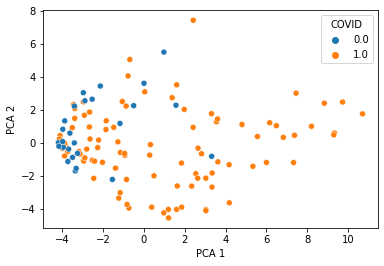

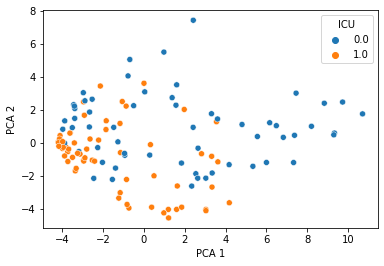

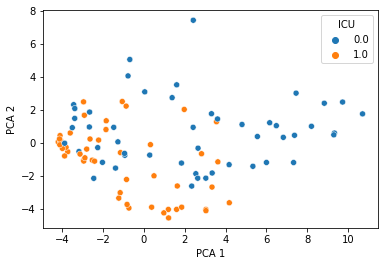

In [60]:
df_plot = pd.DataFrame(
    data=X_pca,
    columns=['PCA 1', 'PCA 2'],
    index=df_ap.index
)
df_plot['COVID'] = df_meta.loc[df_ap.index]['COVID']
df_plot['ICU'] = df_meta.loc[df_ap.index]['ICU_1']

df_plot_covid = df_plot.loc[df_plot['COVID'] == 1]
 
    
sns.scatterplot(data=df_plot, x='PCA 1', y='PCA 2', hue='COVID')
plt.show()

sns.scatterplot(data=df_plot, x='PCA 1', y='PCA 2', hue='ICU')
plt.show()

sns.scatterplot(data=df_plot_covid, x='PCA 1', y='PCA 2', hue='ICU')
plt.show()

### Train a logistic regression model to predict ICU vs. non-ICU within the COVID-19 cohort

Our goal will be to see any LVs that are associated with ICU-status. We will use the L1 penalty in order to induce sparsity in the coefficients. To find the ideal penalty value, we will use cross-fold validation.

In [92]:
PARAMETERS = {
    'C': [
        0.001, 
        0.01, 
        0.1, 
        1.0,
        10.0,
        100.0
    ]
}
MAX_ITER = 200000

lr_model = LogisticRegression(penalty='l1', solver='liblinear')

X_train = np.array(df_ap.loc[df_meta['COVID'] == 1])
y_train = np.array(df_meta.loc[df_meta['COVID'] == 1]['ICU_1'])

clf = GridSearchCV(lr_model, PARAMETERS, scoring='f1')
clf.fit(X_train, y_train)

best_params = max(
    zip(
        clf.cv_results_['param_C'], 
        clf.cv_results_['mean_test_score']
    ),
    key=lambda x: x[1]
)
best_C = best_params[0]
print('Mean test scores:')
print(clf.cv_results_['mean_test_score'])
print("Best C chosen: ", best_C)



Mean test scores:
[0.         0.         0.31764706 0.76702816 0.72193277 0.73010271]
Best C chosen:  1.0


#### Fit the model with optimal L1-penalty value on the entire dataset

In [78]:
# Fit model on full dataset
lr_model = LogisticRegression(penalty='l1', solver='liblinear', C=best_C)
lr_model.fit(X_train, y_train)
coeffs = lr_model.coef_
coeffs = coeffs.squeeze()
coeffs

array([ 0.        ,  0.        , -0.29472321,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.20280801,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.49778209,  0.        ,
        0.        ,  0.        ,  0.68314429,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.98570548,  0.        ,  0.        ,
        0.        ,  0.        , -0.25930847,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.58317642,  0.        ,
        0.        , -0.12496444, -0.32677881,  0.        , -0.4050547 ,
        0.        ,  0.        ,  0.        ,  0.        , -0.93775073,
        0.        ,  0.        ,  0.        , -0.74236242,  0.        ,
        0.        ,  0.62747363,  0.        ,  0.        ,  0.  

### Extract the LVs that were selected by the classifier

In [83]:
# Select positive features
up_model_coeffs = [
    (feat, coef)
    for feat, coef in zip(df_ap.columns, coeffs)
    if coef > 0.0
]
up_model_coeffs_df = pd.DataFrame(
    data=up_model_coeffs,
    columns=['feature', 'coefficient']
)
up_model_coeffs_df = up_model_coeffs_df.set_index('feature')
up_model_coeffs_df

,coefficient
feature,
23,1.497782
27,0.683144
48,0.583176
66,0.627474
73,0.222231
89,0.227967
98,0.352758


In [84]:
down_model_coeffs = [
    (feat, coef)
    for feat, coef in zip(df_ap.columns, coeffs)
    if coef < 0.0
]
down_model_coeffs_df = pd.DataFrame(
    data=down_model_coeffs,
    columns=['feature', 'coefficient']
)
down_model_coeffs_df = down_model_coeffs_df.set_index('feature')
down_model_coeffs_df

,coefficient
feature,
2,-0.294723
8,-1.202808
37,-0.985705
42,-0.259308
51,-0.124964
52,-0.326779
54,-0.405055
59,-0.937751
63,-0.742362


### Now let's examine which pathways are high in some of these LVs

Some of these results look interesting on first glance! For example, the PEPI pathway seems to be involved in IL-8 secretion, which is known to contribute to COVID-19 severity

Another interesting result is that obesity appears to be a gene set that pops up. We know that obesity is correlated with poor outcome

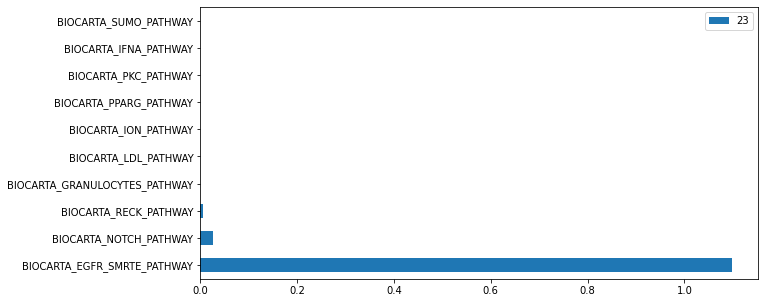

In [85]:
plot.plot_top_pathways([23], 10, (10,5), mod)
plt.show()

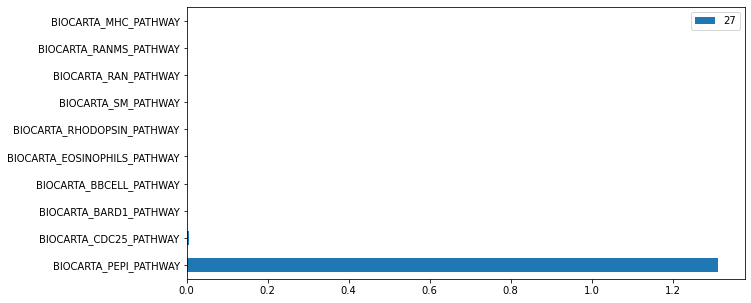

In [86]:
plot.plot_top_pathways([27], 10, (10,5), mod)
plt.show()

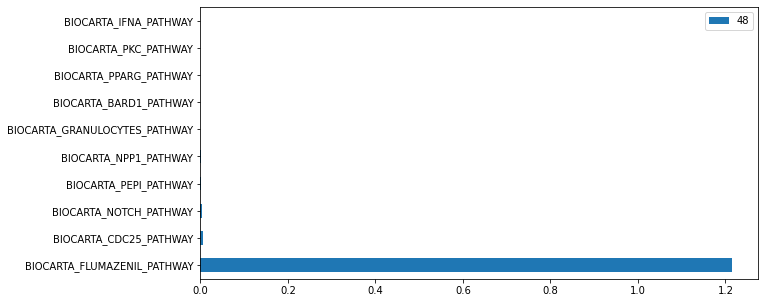

In [87]:
plot.plot_top_pathways([48], 10, (10,5), mod)
plt.show()

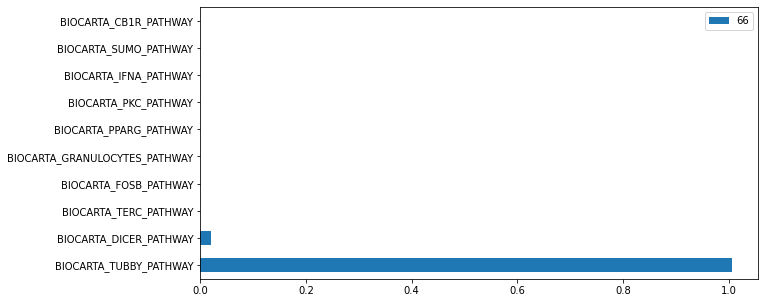

In [88]:
plot.plot_top_pathways([66], 10, (10,5), mod)
plt.show()

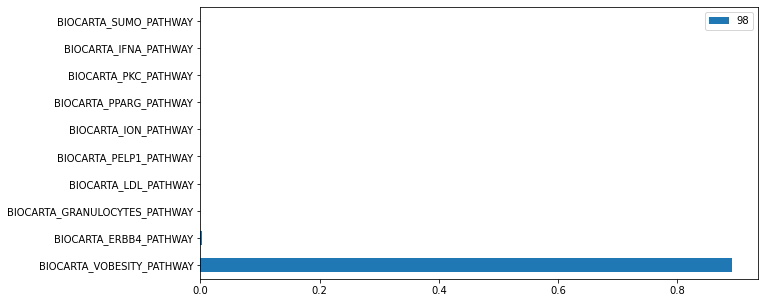

In [89]:
plot.plot_top_pathways([98], 10, (10,5), mod)
plt.show()

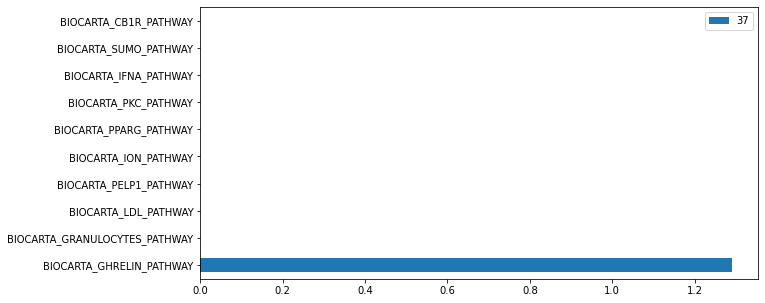

In [108]:
plot.plot_top_pathways([37], 10, (10,5), mod)
plt.show()

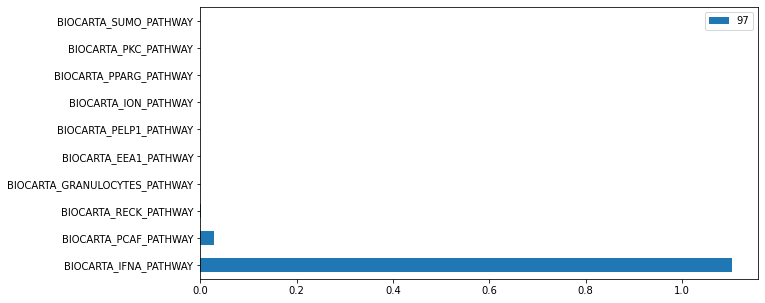

In [109]:
plot.plot_top_pathways([97], 10, (10,5), mod)
plt.show()

<AxesSubplot:xlabel='27', ylabel='Density'>

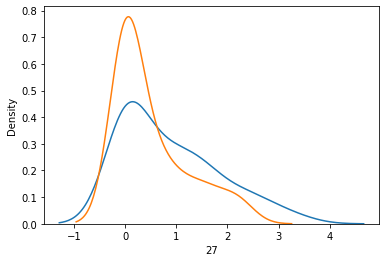

In [103]:
sns.kdeplot(
    df_ap.loc[(df_meta['COVID'] == 1) &  (df_meta['ICU_1'] == 1)][27]
)
sns.kdeplot(
    df_ap.loc[(df_meta['COVID'] == 1) &  (df_meta['ICU_1'] == 0)][27]
)

<AxesSubplot:xlabel='8', ylabel='Density'>

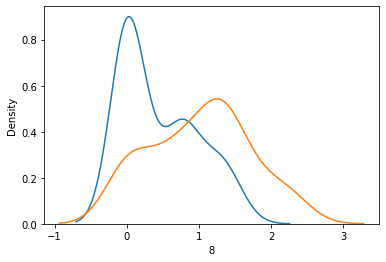

In [106]:
sns.kdeplot(
    df_ap.loc[(df_meta['COVID'] == 1) &  (df_meta['ICU_1'] == 1)][8]
)
sns.kdeplot(
    df_ap.loc[(df_meta['COVID'] == 1) &  (df_meta['ICU_1'] == 0)][8]
)